In [1]:
import pandas as pd
import numpy as np
import pickle 
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from prettytable import PrettyTable

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In the Feature engineering and Data prepration section I created 8 sets of features and working with all of them and getting best model out of it, will be time taking. So to save some time, I will be using xgboost to select out which set of data I will continue to work with. 
## <font color='Maroon'>Unigram BOW 

In [4]:
with open('unigram_bow_train.pkl','rb') as f:
    train_x = pickle.load(f)
    
with open('unigram_bow_test.pkl','rb') as f:
    test_x = pickle.load(f)
    
print('Shape of training set:',train_x.shape)
print('Shape of test set:', test_x.shape)

Shape of training set: (188318, 350)
Shape of test set: (125546, 350)


In [6]:
y = np.log(train_df['loss'])
dtrain = xgb.DMatrix(train_x, y)
dtest = xgb.DMatrix(test_x)

In [7]:
param = {'eval_metric':'mae'}
model = xgb.train(param, dtrain, num_boost_round=1000)
y_pred = np.exp(model.predict(dtest))
submission = pd.DataFrame({'id':test_df['id'],'loss':y_pred})
submission.to_csv('Sub_uni_bow.csv',index=False)

The *Sub_uni_bow.csv* file generated in above step, I will use it to do submission on kaggle. 
<br>
After submitting it on kaggle, score generated is shown below: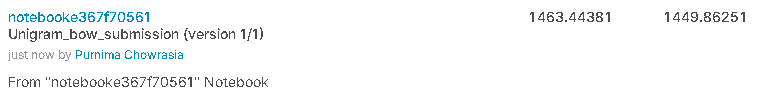

## <font color='Maroon'>Bigram BOW 

In [8]:
with open('bigram_bow_train.pkl','rb') as f:
    train_x = pickle.load(f)
    
with open('bigram_bow_test.pkl','rb') as f:
    test_x = pickle.load(f)
    
print('Shape of training set:',train_x.shape)
print('Shape of test set:', test_x.shape)

Shape of training set: (188318, 4373)
Shape of test set: (125546, 4373)


In [9]:
y = np.log(train_df['loss'])
dtrain = xgb.DMatrix(train_x, y)
dtest = xgb.DMatrix(test_x)

In [10]:
param = {'eval_metric':'mae'}
model = xgb.train(param, dtrain, num_boost_round=1000)
y_pred = np.exp(model.predict(dtest))
submission = pd.DataFrame({'id':test_df['id'],'loss':y_pred})
submission.to_csv('Sub_bi_bow.csv',index=False)

After Submission on kaggle score generated are:
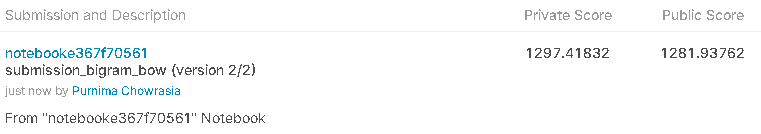

Just by using all bigram features, and applying xgboost on it with all default parameters I can see a huge improvement in score. I have around 4k features in this set, why not select top 1000 fetures and then follow the same procedure. 
## <font color='Maroon'>Bigram BOW(1000 features)

In [11]:
from sklearn.feature_selection import SelectKBest, f_regression

skb = SelectKBest(k=1000, score_func=f_regression)
train_x = skb.fit_transform(train_x, y)
test_x = skb.transform(test_x)

print('Shape of training set:',train_x.shape)
print('Shape of test set:', test_x.shape)

Shape of training set: (188318, 1000)
Shape of test set: (125546, 1000)


In [12]:
dtrain = xgb.DMatrix(train_x, y)
dtest = xgb.DMatrix(test_x)

In [13]:
param = {'eval_metric':'mae'}
model = xgb.train(param, dtrain, num_boost_round=1000)
y_pred = np.exp(model.predict(dtest))
submission = pd.DataFrame({'id':test_df['id'],'loss':y_pred})
submission.to_csv('Sub_bi_bow_1000.csv',index=False)

After submission on kaggle score generated is:
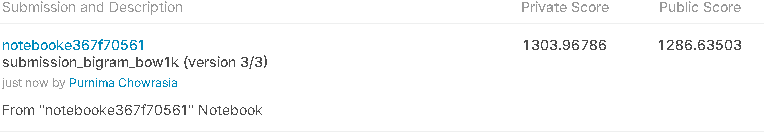

## <font color='Maroon'>Trigram BOW

In [14]:
with open('trigram_bow_train.pkl','rb') as f:
    train_x = pickle.load(f)
    
with open('trigram_bow_test.pkl','rb') as f:
    test_x = pickle.load(f)
    
print('Shape of training set:',train_x.shape)
print('Shape of test set:', test_x.shape)

Shape of training set: (188318, 37458)
Shape of test set: (125546, 37458)


With trigram, number of dimension is very large. Hence I will select 1000 features and work with it.

In [15]:
y = np.log(train_df['loss'])
skb = SelectKBest(k=1000, score_func=f_regression)
train_x = skb.fit_transform(train_x, y)
test_x = skb.transform(test_x)

print('Shape of training set:',train_x.shape)
print('Shape of test set:', test_x.shape)

Shape of training set: (188318, 1000)
Shape of test set: (125546, 1000)


In [16]:
dtrain = xgb.DMatrix(train_x, y)
dtest = xgb.DMatrix(test_x)

In [17]:
param = {'eval_metric':'mae'}
model = xgb.train(param, dtrain, num_boost_round=1000)
y_pred = np.exp(model.predict(dtest))
submission = pd.DataFrame({'id':test_df['id'],'loss':y_pred})
submission.to_csv('Sub_tri_bow_1000.csv',index=False)

After submission on kaggle, score generated is:
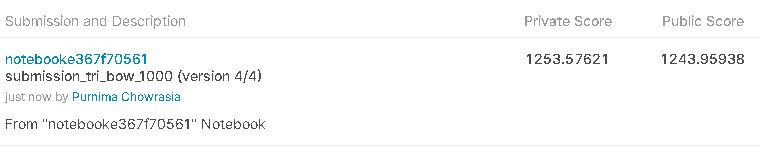

## <font color='Maroon'>Unigram TFIDF

In [18]:
with open('unigram_tfidf_train.pkl','rb') as f:
    train_x = pickle.load(f)
    
with open('unigram_tfidf_test.pkl','rb') as f:
    test_x = pickle.load(f)
    
print('Shape of training set:',train_x.shape)
print('Shape of test set:', test_x.shape)

Shape of training set: (188318, 350)
Shape of test set: (125546, 350)


In [19]:
y = np.log(train_df['loss'])
dtrain = xgb.DMatrix(train_x, y)
dtest = xgb.DMatrix(test_x)

In [20]:
param = {'eval_metric':'mae'}
model = xgb.train(param, dtrain, num_boost_round=1000)
y_pred = np.exp(model.predict(dtest))
submission = pd.DataFrame({'id':test_df['id'],'loss':y_pred})
submission.to_csv('Sub_uni_tfidf.csv',index=False)

After submission on kaggle, score generated is: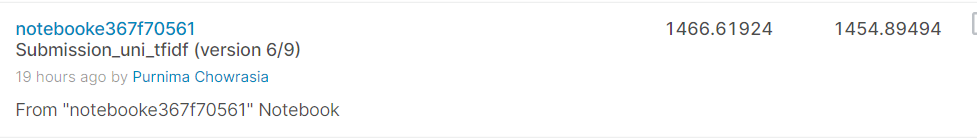

## <font color='Maroon'>Bigram TFIDF

In [21]:
with open('bigram_tfidf_train.pkl','rb') as f:
    train_x = pickle.load(f)
    
with open('bigram_tfidf_test.pkl','rb') as f:
    test_x = pickle.load(f)
    
print('Shape of training set:',train_x.shape)
print('Shape of test set:', test_x.shape)

Shape of training set: (188318, 4373)
Shape of test set: (125546, 4373)


In [22]:
y = np.log(train_df['loss'])
dtrain = xgb.DMatrix(train_x, y)
dtest = xgb.DMatrix(test_x)

In [23]:
param = {'eval_metric':'mae'}
model = xgb.train(param, dtrain, num_boost_round=1000)
y_pred = np.exp(model.predict(dtest))
submission = pd.DataFrame({'id':test_df['id'],'loss':y_pred})
submission.to_csv('Sub_bi_tfidf.csv',index=False)

After Submission on kaggle score generated are:
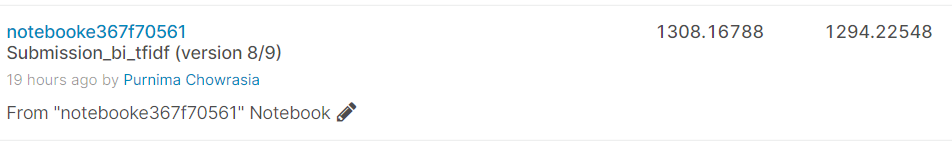

## <font color='Maroon'>Bigram TFIDF(1000 features)

In [24]:
skb = SelectKBest(k=1000, score_func=f_regression)
train_x = skb.fit_transform(train_x, y)
test_x = skb.transform(test_x)

print('Shape of training set:',train_x.shape)
print('Shape of test set:', test_x.shape)

Shape of training set: (188318, 1000)
Shape of test set: (125546, 1000)


In [25]:
dtrain = xgb.DMatrix(train_x, y)
dtest = xgb.DMatrix(test_x)

In [26]:
param = {'eval_metric':'mae'}
model = xgb.train(param, dtrain, num_boost_round=1000)
y_pred = np.exp(model.predict(dtest))
submission = pd.DataFrame({'id':test_df['id'],'loss':y_pred})
submission.to_csv('Sub_bi_tfidf_1000.csv',index=False)

After submission on kaggle score generated is:
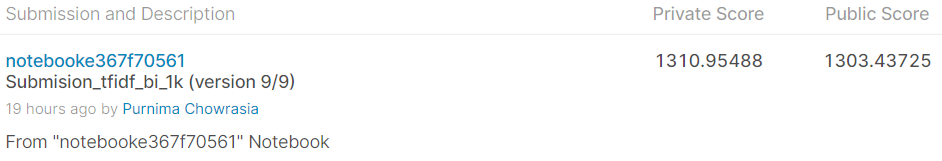

## <font color='Maroon'>Trigram TFIDF

In [13]:
with open('trigram_tfidf_train.pkl','rb') as f:
    train_x = pickle.load(f)
    
with open('trigram_tfidf_test.pkl','rb') as f:
    test_x = pickle.load(f)
    
print('Shape of training set:',train_x.shape)
print('Shape of test set:', test_x.shape)

Shape of training set: (188318, 37458)
Shape of test set: (125546, 37458)


With trigram, number of dimension is very large. Hence I will select 1000 features and work with it.

In [14]:
from sklearn.feature_selection import SelectKBest, f_regression
y = np.log(train_df['loss'])
skb = SelectKBest(k=1000, score_func=f_regression)
train_x = skb.fit_transform(train_x, y)
test_x = skb.transform(test_x)

print('Shape of training set:',train_x.shape)
print('Shape of test set:', test_x.shape)

Shape of training set: (188318, 1000)
Shape of test set: (125546, 1000)


In [15]:
dtrain = xgb.DMatrix(train_x, y)
dtest = xgb.DMatrix(test_x)

In [16]:
param = {'eval_metric':'mae'}
model = xgb.train(param, dtrain, num_boost_round=1000)
y_pred = np.exp(model.predict(dtest))
submission = pd.DataFrame({'id':test_df['id'],'loss':y_pred})
submission.to_csv('Sub_tri_tfidf_1000.csv',index=False)

After submission on kaggle, score generated is:
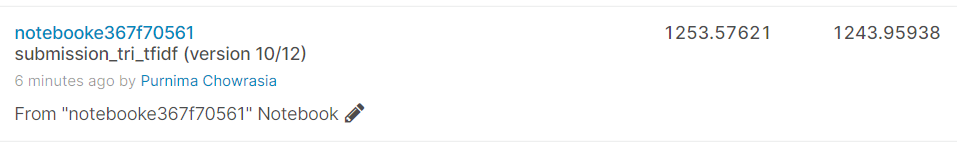

## <font color='Maroon'>Bigram BOW features + Trigram features + Continuous features

In [17]:
with open('bi-trigram_bow_train.pkl','rb') as f:
    train_x = pickle.load(f)
    
with open('bi-trigram_bow_test.pkl','rb') as f:
    test_x = pickle.load(f)
    
print('Shape of training set:',train_x.shape)
print('Shape of test set:', test_x.shape)

Shape of training set: (188318, 41819)
Shape of test set: (125546, 41819)


With bigram+trigram, number of dimension is very large. Hence I will select 1000 features and work with it.
### With 1000 features:

In [18]:
from sklearn.feature_selection import SelectKBest, f_regression
y = np.log(train_df['loss'])
skb = SelectKBest(k=1000, score_func=f_regression)
train_x = skb.fit_transform(train_x, y)
test_x = skb.transform(test_x)

print('Shape of training set:',train_x.shape)
print('Shape of test set:', test_x.shape)

Shape of training set: (188318, 1000)
Shape of test set: (125546, 1000)


In [19]:
dtrain = xgb.DMatrix(train_x, y)
dtest = xgb.DMatrix(test_x)

In [20]:
param = {'eval_metric':'mae'}
model = xgb.train(param, dtrain, num_boost_round=1000)
y_pred = np.exp(model.predict(dtest))
submission = pd.DataFrame({'id':test_df['id'],'loss':y_pred})
submission.to_csv('Sub_bi_tri_bow.csv',index=False)

After submission on kaggle, score generated is:
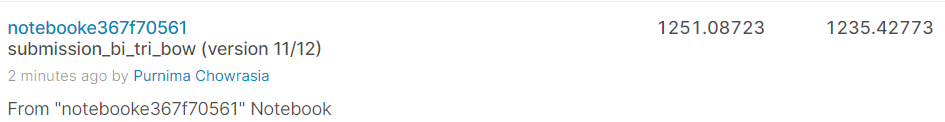

### With 1500 features:

In [4]:
with open('bi-trigram_bow_train.pkl','rb') as f:
    train_x = pickle.load(f)
    
with open('bi-trigram_bow_test.pkl','rb') as f:
    test_x = pickle.load(f)
    
print('Shape of training set:',train_x.shape)
print('Shape of test set:', test_x.shape)

Shape of training set: (188318, 41819)
Shape of test set: (125546, 41819)


In [5]:
from sklearn.feature_selection import SelectKBest, f_regression
y = np.log(train_df['loss'])
skb = SelectKBest(k=1500, score_func=f_regression)
train_x = skb.fit_transform(train_x, y)
test_x = skb.transform(test_x)

print('Shape of training set:',train_x.shape)
print('Shape of test set:', test_x.shape)

Shape of training set: (188318, 1500)
Shape of test set: (125546, 1500)


In [6]:
dtrain = xgb.DMatrix(train_x, y)
dtest = xgb.DMatrix(test_x)

In [7]:
param = {'eval_metric':'mae'}
model = xgb.train(param, dtrain, num_boost_round=1000)
y_pred = np.exp(model.predict(dtest))
submission = pd.DataFrame({'id':test_df['id'],'loss':y_pred})
submission.to_csv('Sub_bi_tri_bow1500.csv',index=False)

After submission on kaggle, scores generated are:
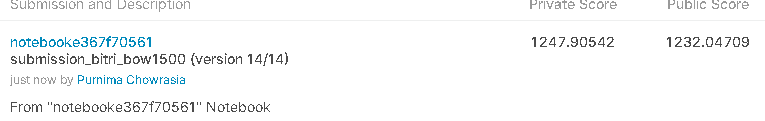

## <font color='Maroon'>Bigram TFIDF features + Trigram features + Continuous features

In [21]:
with open('bi-trigram_tfidf_train.pkl','rb') as f:
    train_x = pickle.load(f)
    
with open('bi-trigram_tfidf_test.pkl','rb') as f:
    test_x = pickle.load(f)
    
print('Shape of training set:',train_x.shape)
print('Shape of test set:', test_x.shape)

Shape of training set: (188318, 41819)
Shape of test set: (125546, 41819)


With bigram+trigram, number of dimension is very large. Hence I will select 1000 features and work with it.
### With 1000 features:

In [22]:
from sklearn.feature_selection import SelectKBest, f_regression
y = np.log(train_df['loss'])
skb = SelectKBest(k=1000, score_func=f_regression)
train_x = skb.fit_transform(train_x, y)
test_x = skb.transform(test_x)

print('Shape of training set:',train_x.shape)
print('Shape of test set:', test_x.shape)

Shape of training set: (188318, 1000)
Shape of test set: (125546, 1000)


In [23]:
dtrain = xgb.DMatrix(train_x, y)
dtest = xgb.DMatrix(test_x)

In [24]:
param = {'eval_metric':'mae'}
model = xgb.train(param, dtrain, num_boost_round=1000)
y_pred = np.exp(model.predict(dtest))
submission = pd.DataFrame({'id':test_df['id'],'loss':y_pred})
submission.to_csv('Sub_bi_tri_tfidf.csv',index=False)

After submission on kaggle, score generated is:
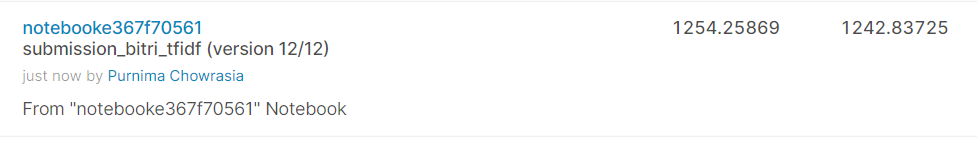

### With 1500 features:

In [10]:
with open('bi-trigram_tfidf_train.pkl','rb') as f:
    train_x = pickle.load(f)
    
with open('bi-trigram_tfidf_test.pkl','rb') as f:
    test_x = pickle.load(f)
    
print('Shape of training set:',train_x.shape)
print('Shape of test set:', test_x.shape)

Shape of training set: (188318, 41819)
Shape of test set: (125546, 41819)


In [11]:
from sklearn.feature_selection import SelectKBest, f_regression
y = np.log(train_df['loss'])
skb = SelectKBest(k=1500, score_func=f_regression)
train_x = skb.fit_transform(train_x, y)
test_x = skb.transform(test_x)

print('Shape of training set:',train_x.shape)
print('Shape of test set:', test_x.shape)

Shape of training set: (188318, 1500)
Shape of test set: (125546, 1500)


In [12]:
dtrain = xgb.DMatrix(train_x, y)
dtest = xgb.DMatrix(test_x)

In [13]:
param = {'eval_metric':'mae'}
model = xgb.train(param, dtrain, num_boost_round=1000)
y_pred = np.exp(model.predict(dtest))
submission = pd.DataFrame({'id':test_df['id'],'loss':y_pred})
submission.to_csv('Sub_bi_tri_tfidf1500.csv',index=False)

After submission on kaggle, scores generated are:
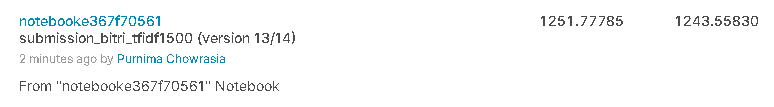

## <font color='Maroon'>Summary of Scores:

In [2]:
x = PrettyTable()
x.field_names = ['Feature Set','# of features','Private Score']
x.add_row(['Unigram-BOW','350','1463.44'])
x.add_row(['Bigram-BOW','4373','1297.41'])
x.add_row(['Bigram-BOW','1000','1303.96'])
x.add_row(['Tigram-BOW','1000','1253.57'])
x.add_row(['Unigram-TFIDF','350','1466.61'])
x.add_row(['Bigram-TFIDF','4373','1308.16'])
x.add_row(['Bigram-TFIDF','1000','1310.95'])
x.add_row(['Tigram-TFIDF','1000','1253.57'])
x.add_row(['Bigram-Trigram-BOW','1000','1251.08'])
x.add_row(['Bigram-Trigram-BOW','1500','1247.90'])
x.add_row(['Bigram-Trigram-TFIDF','1000','1254.25'])
x.add_row(['Bigram-Trigram-TFIDF','1500','1251.77'])

In [3]:
print(x)

+----------------------+---------------+---------------+
|     Feature Set      | # of features | Private Score |
+----------------------+---------------+---------------+
|     Unigram-BOW      |      350      |    1463.44    |
|      Bigram-BOW      |      4373     |    1297.41    |
|      Bigram-BOW      |      1000     |    1303.96    |
|      Tigram-BOW      |      1000     |    1253.57    |
|    Unigram-TFIDF     |      350      |    1466.61    |
|     Bigram-TFIDF     |      4373     |    1308.16    |
|     Bigram-TFIDF     |      1000     |    1310.95    |
|     Tigram-TFIDF     |      1000     |    1253.57    |
|  Bigram-Trigram-BOW  |      1000     |    1251.08    |
|  Bigram-Trigram-BOW  |      1500     |    1247.90    |
| Bigram-Trigram-TFIDF |      1000     |    1254.25    |
| Bigram-Trigram-TFIDF |      1500     |    1251.77    |
+----------------------+---------------+---------------+


* TFIDF feature sets didn't performed any better than BOW. 
* Trigram features performed much better than Unigram and Bigram features.
* When Bigram and Trigram features are combined together they performed slightly better.

**So I will choose bigram-bow and trigram-bow as best set of features.And proceed with them in final part of this project i.e Model building part.**